# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openweathermapy

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv
import openweathermapy as ow
from pprint import pprint
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from geopy.geocoders import Nominatim

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

588

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Establish relevant variables
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

#Set up call structure

record_counter = 1
set_counter = 1

# URL establishment
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
        time.sleep(10)

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    #print(url)
    try:     
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
        
    except:
        
        print(response)

------------------------
Beginning Data Retrieval
------------------------
Processing record 2 of set 1 | jamestown
Processing record 3 of set 1 | barrow
Processing record 4 of set 1 | conchagua
Processing record 5 of set 1 | alta floresta
Processing record 6 of set 1 | attawapiskat
{'cod': '404', 'message': 'city not found'}
Processing record 7 of set 1 | ushuaia
Processing record 8 of set 1 | bredasdorp
Processing record 9 of set 1 | nanortalik
Processing record 10 of set 1 | nizhneyansk
{'cod': '404', 'message': 'city not found'}
Processing record 11 of set 1 | tucuma
Processing record 12 of set 1 | kapaa
Processing record 13 of set 1 | busselton
Processing record 14 of set 1 | pisco
Processing record 15 of set 1 | lasa
Processing record 16 of set 1 | tulle
Processing record 17 of set 1 | rikitea
Processing record 18 of set 1 | port elizabeth
Processing record 19 of set 1 | tezu
Processing record 20 of set 1 | mataura
Processing record 21 of set 1 | faanui
Processing record 22 of se

Processing record 30 of set 4 | kavieng
Processing record 31 of set 4 | tiksi
Processing record 32 of set 4 | ilulissat
Processing record 33 of set 4 | padang
Processing record 34 of set 4 | abalak
Processing record 35 of set 4 | aklavik
Processing record 36 of set 4 | mrirt
{'cod': '404', 'message': 'city not found'}
Processing record 37 of set 4 | corn island
Processing record 38 of set 4 | itoman
Processing record 39 of set 4 | jomalig
{'cod': '404', 'message': 'city not found'}
Processing record 40 of set 4 | lebu
Processing record 41 of set 4 | poronaysk
Processing record 42 of set 4 | narsaq
Processing record 43 of set 4 | sydney mines
Processing record 44 of set 4 | dakar
Processing record 45 of set 4 | caohe
Processing record 46 of set 4 | kamenskoye
{'cod': '404', 'message': 'city not found'}
Processing record 47 of set 4 | carnarvon
Processing record 48 of set 4 | cidreira
Processing record 49 of set 4 | hasaki
Processing record 50 of set 4 | buala
Processing record 0 of set 

Processing record 8 of set 8 | luwuk
Processing record 9 of set 8 | maningrida
Processing record 10 of set 8 | broome
Processing record 11 of set 8 | la ronge
Processing record 12 of set 8 | manzhouli
Processing record 13 of set 8 | freeport
Processing record 14 of set 8 | meulaboh
Processing record 15 of set 8 | hualmay
Processing record 16 of set 8 | iqaluit
Processing record 17 of set 8 | soria
Processing record 18 of set 8 | lohne
Processing record 19 of set 8 | camapua
Processing record 20 of set 8 | praia da vitoria
Processing record 21 of set 8 | kirishi
Processing record 22 of set 8 | san patricio
Processing record 23 of set 8 | urumqi
Processing record 24 of set 8 | det udom
Processing record 25 of set 8 | kerema
Processing record 26 of set 8 | filingue
Processing record 27 of set 8 | hauterive
Processing record 28 of set 8 | tynda
Processing record 29 of set 8 | krasnoselkup
Processing record 30 of set 8 | bargal
{'cod': '404', 'message': 'city not found'}
Processing record 3

Processing record 38 of set 11 | walvis bay
Processing record 39 of set 11 | grand gaube
Processing record 40 of set 11 | goderich
Processing record 41 of set 11 | nokaneng
Processing record 42 of set 11 | riosucio
Processing record 43 of set 11 | sao filipe
Processing record 44 of set 11 | kastamonu
Processing record 45 of set 11 | ayr
Processing record 46 of set 11 | matagami
Processing record 47 of set 11 | akureyri
Processing record 48 of set 11 | half moon bay
Processing record 49 of set 11 | sangar
Processing record 50 of set 11 | traverse city
Processing record 0 of set 12 | lobva
Processing record 1 of set 12 | manaia
Processing record 2 of set 12 | port-cartier
Processing record 3 of set 12 | of
{'cod': '404', 'message': 'city not found'}
Processing record 4 of set 12 | gondanglegi
Processing record 5 of set 12 | dali
Processing record 6 of set 12 | biak
Processing record 7 of set 12 | waipawa
Processing record 8 of set 12 | saint-paul
Processing record 9 of set 12 | rabaul
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_data = pd.DataFrame({
    
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
})

weather_data

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,jamestown,90,US,1596595994,88,66.00,42.10,-79.24,8.05
1,barrow,90,US,1596595995,81,44.60,71.29,-156.79,6.93
2,conchagua,100,SV,1596595995,94,76.73,13.31,-87.86,4.63
3,alta floresta,0,BR,1596595995,48,73.49,-9.88,-56.09,4.79
4,ushuaia,20,AR,1596595995,37,50.00,-54.80,-68.30,14.99
...,...,...,...,...,...,...,...,...,...
532,xuddur,90,SO,1596596190,76,73.42,4.12,43.89,18.90
533,mmathubudukwane,0,BW,1596596191,52,41.00,-24.60,26.43,4.70
534,puerto escondido,100,MX,1596596191,80,81.57,15.85,-97.07,3.38
535,ust-karsk,100,RU,1596596191,91,59.72,52.70,118.81,2.89


In [10]:
weather_data.to_csv(r'weather_data_jc.csv', index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

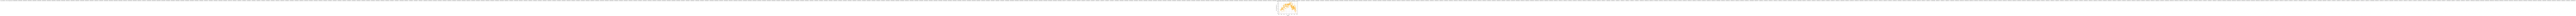

In [11]:
weather_data.plot(kind='scatter', x='Lat', y='Temp', c='Orange')
plt.title('City Latitude vs. Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../Images/Lat_V_Temp.png")

#### Latitude vs. Humidity Plot

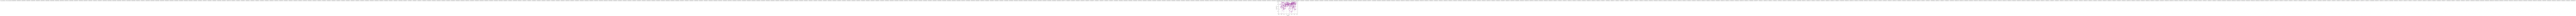

In [12]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='Purple')
plt.title('City Latitude vs. Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/Lat_V_Humid.png")

#### Latitude vs. Cloudiness Plot

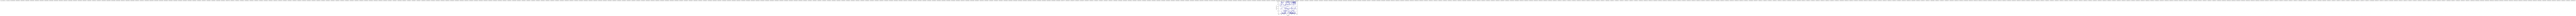

In [13]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude vs. Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/Lat_V_Cloud.png")

#### Latitude vs. Wind Speed Plot

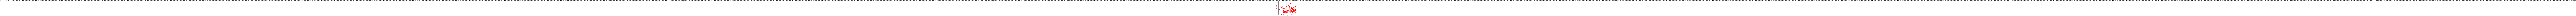

In [14]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='Red')
plt.title('City Latitude vs. Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/Lat_V_Wind.png")

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression